## Exercícios

1. Implemente o método de detecção de normais apresentado.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ponte = np.array(Image.open("ponte.png"))

#### Método greyscale Luminosity:

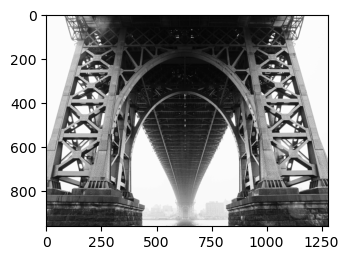

In [16]:
def greyscale(img):
    grey_img = (img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722).astype(np.uint8)
    
    return grey_img

ponte_grey = greyscale(ponte)

# Mostrando a imagem do dog com oculos cisalhada em escala de tons de cinza na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(ponte_grey, cmap="gray")

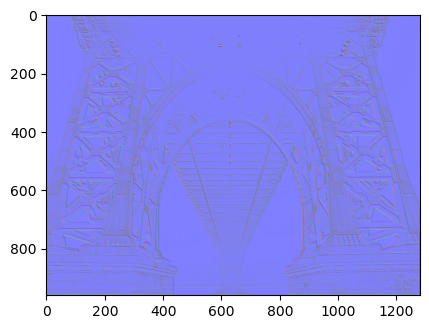

In [18]:
def calcular_normais(imagem):
    # Derivadas parciais
    dx = np.diff(imagem, axis=1, append=255)
    dy = np.diff(imagem, axis=0, append=255)
    
    # Gradiente da imagem
    gradiente = np.sqrt(dx**2 + dy**2)
    
    # Cálculo das normais
    r = (-dx + 255) / 2
    g = (dy + 255) / 2
    b = 255 - gradiente
    
    # Empilhamento das componentes para formar a imagem de normais
    normais = np.stack((r, g, b), axis=-1).astype(np.uint8)
    
    return normais

# Calcular as normais da imagem
normais_ponte = calcular_normais(ponte_grey)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.imshow(normais_ponte)


2. Escolha algum dos métodos de detecção de borda com convolução acima (exceto Roberts cross) e utilize-o em uma imagem de sua escolha.                  

### Detecção de bordas:

#### Método da convolução e o kernel de Sobel:

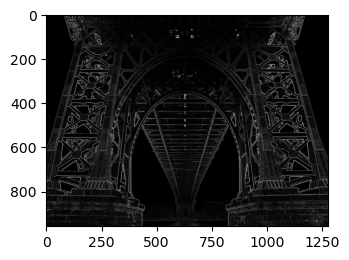

In [18]:
# Argumentos:
# * image: imagem grayscale de entrada (corresponde ao f da fórmula)
# * kernel: filtro de convolução

# Retorno:
# * a convolução entre image e kernel

def conv(image, kernel):
    m, n = kernel.shape
    # assert verifica se uma condição é verdadeira e mostra uma mensagem de erro caso falhe:
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    # novas dimensões da imagem (imagem menos o tamanho do filtro):
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            # soma da multiplicação ponto-a-ponto entre o kernel e a imagem (recorte do trecho da imagem do mesmo tamanho do kernel):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

def sobel(img):
    kernel_x = np.array([[1, 0,-1], [ 2, 0, -2],[1,0,-1]], dtype=np.float64)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0],[-1,-2,-1]], dtype=np.float64)
    
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient
    

ponte_borda = sobel(ponte_grey/255.0)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(ponte_borda, cmap="gray")
